<a href="https://colab.research.google.com/github/abroniewski/Child-Wasting-Prediction/blob/main/notebooks/acled/time_series_grouping_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Time Series

Creating time series visualizations with a modification of code provided by Dr. Juan Camilo Orduz in his blog names [Regression Analysis & Visualization](https://juanitorduz.github.io/lm_viz/) published 2020-06-26

In [24]:
# General imports
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
data_dir = "https://raw.githubusercontent.com/abroniewski/Child-Wasting-Prediction/main/data/raw/1900-01-01-2022-09-27-Eastern_Africa-Somalia.csv"

conflict_df = pd.read_csv(data_dir)

# Dropping the unnecessary columns
df_clean = conflict_df.drop(labels=['data_id','iso','event_id_cnty','event_id_no_cnty','year','time_precision','region','country','geo_precision','timestamp','iso3'],axis=1)
df_clean['event_date'] = pd.to_datetime(df_clean['event_date']) # convert event_date to date format

In [26]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Data Viz. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [27]:
df_clean.head(1)

,event_date,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,admin1,admin2,admin3,location,latitude,longitude,source,source_scale,notes,fatalities
0,2022-09-23,Explosions/Remote violence,Shelling/artillery/missile attack,Al Shabaab,NaN,2,ATMIS: African Union Transition Mission in Som...,NaN,8,28,Lower Juba,Kismaayo,NaN,Abdale Birole,-0.4906,42.1969,Calamada; Al Furqaan,National,"On 23 September 2022, Al Shabaab militants fir...",0


The commented plot below show every single incident, which is an unnecessarily large amount of data points to visualize.

In [28]:
# fig, ax = plt.subplots()
# sns.lineplot(x='event_date', y='fatalities', data=df_clean, color=sns_c[0], ax=ax)
# ax.set(title='Individual Event Fatalities over Time');

Here we will group the data by week and month to look at a sum of values

In [29]:
df = df_clean
df['event_date'] = pd.to_datetime(df['event_date']) - pd.to_timedelta(7, unit='d')
df_weekly = df.groupby([pd.Grouper(key='event_date', freq='W-MON')])['fatalities'].sum().reset_index().sort_values('event_date')
df_monthly = df.groupby(pd.Grouper(key='event_date', freq='M'))['fatalities'].sum().reset_index().sort_values('event_date')

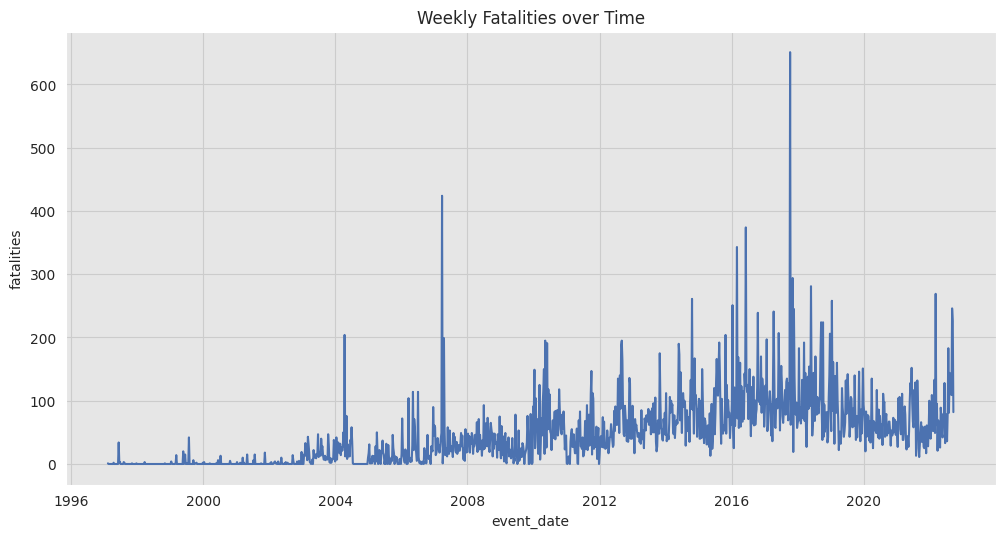

In [30]:
fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_weekly, color=sns_c[0], ax=ax)
ax.set(title='Weekly Fatalities over Time');

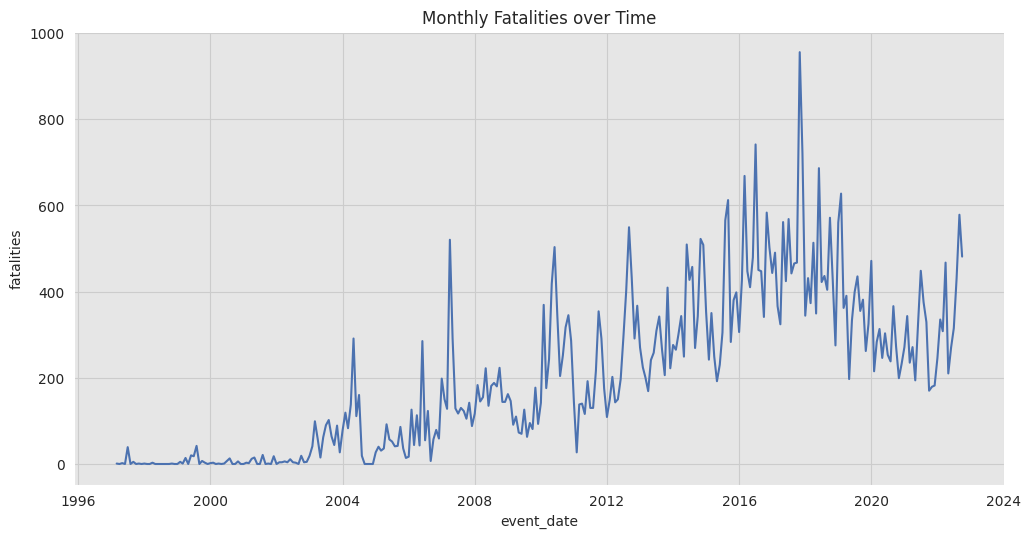

In [31]:
fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly, color=sns_c[0], ax=ax)
ax.set(title='Monthly Fatalities over Time');

Now instead of looking at the sum, we will simply look at the count of how many events occured.

In [32]:
df_monthly_event_count = df.groupby(pd.Grouper(key='event_date', freq='M')).count().reset_index().sort_values('event_date')

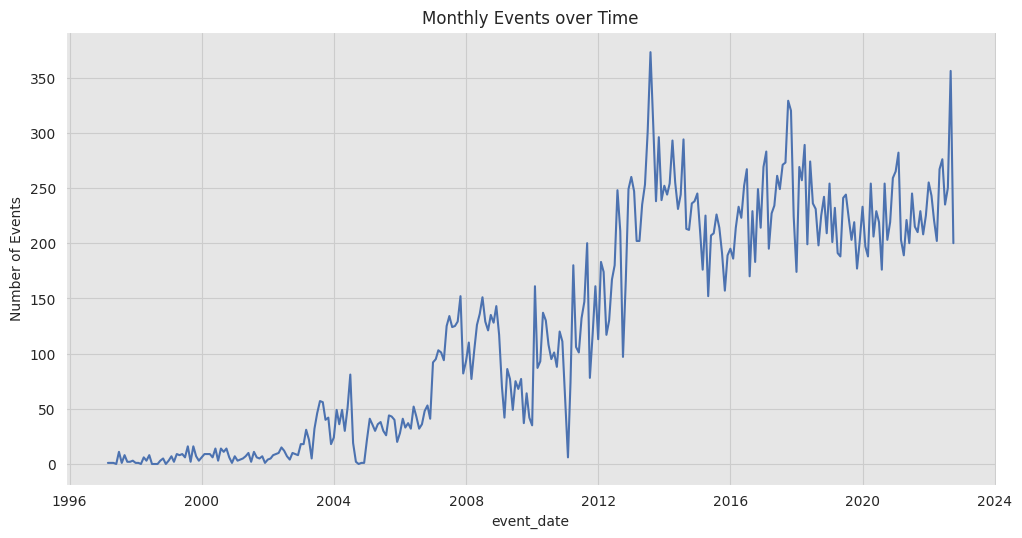

In [33]:
fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_event_count, color=sns_c[0], ax=ax)
ax.set(title='Monthly Events over Time', ylabel='Number of Events');

This shows a count of events that occured grouped by event type.

In [34]:
df_monthly_event_count_by_type = df.groupby(['sub_event_type', pd.Grouper(key='event_date', freq='M')])['fatalities'].count().reset_index().sort_values('event_date')

In [35]:
df_monthly_event_count_by_type.head(10)

,sub_event_type,event_date,fatalities
712,Attack,1997-02-28,1
351,Armed clash,1997-03-31,1
713,Attack,1997-04-30,1
714,Attack,1997-06-30,6
352,Armed clash,1997-06-30,3
1273,Government regains territory,1997-06-30,2
0,Abduction/forced disappearance,1997-07-31,1
353,Armed clash,1997-08-31,5
715,Attack,1997-08-31,3
354,Armed clash,1997-09-30,2


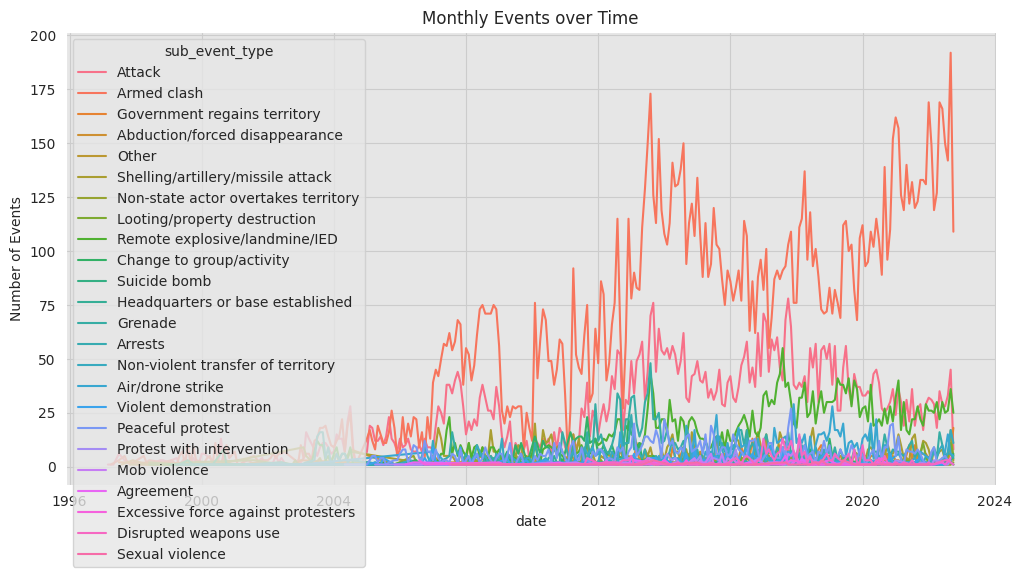

In [36]:
fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_event_count_by_type, color=sns_c[0], ax=ax, hue='sub_event_type')
ax.set(title='Monthly Events over Time', xlabel='date', ylabel='Number of Events');

# Exploring Groupings of Data through Time

Here we will setup different dataframes for visualization. To keep the visualization a bit cleaner, we are setting a minimumum number of events to be included in the visualization, and we set the start date to look at more recent data.

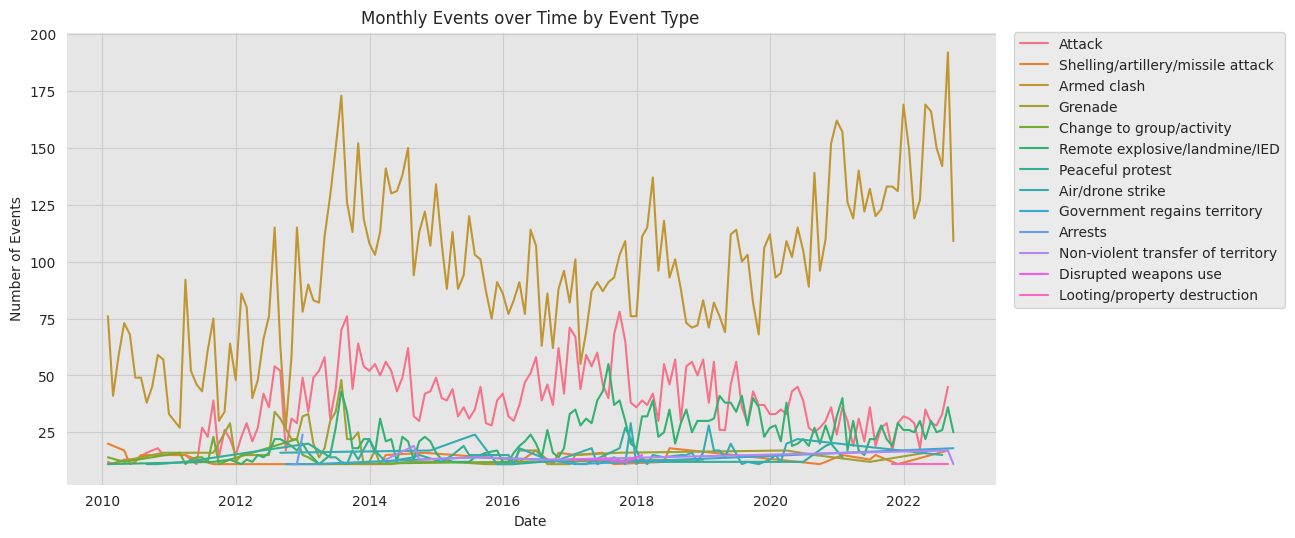

In [37]:
min_count = 10
min_date = pd.to_datetime("2010-01-01")

selection_mask = (df_monthly_event_count_by_type['fatalities']>min_count) & (df_monthly_event_count_by_type['event_date']>min_date)
df_monthly_event_count_by_type_filtered = df_monthly_event_count_by_type[selection_mask]


fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_event_count_by_type_filtered, color=sns_c[0], ax=ax, hue='sub_event_type')
# place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# set labels for axis and title
ax.set(title='Monthly Events over Time by Event Type', xlabel='Date', ylabel='Number of Events');

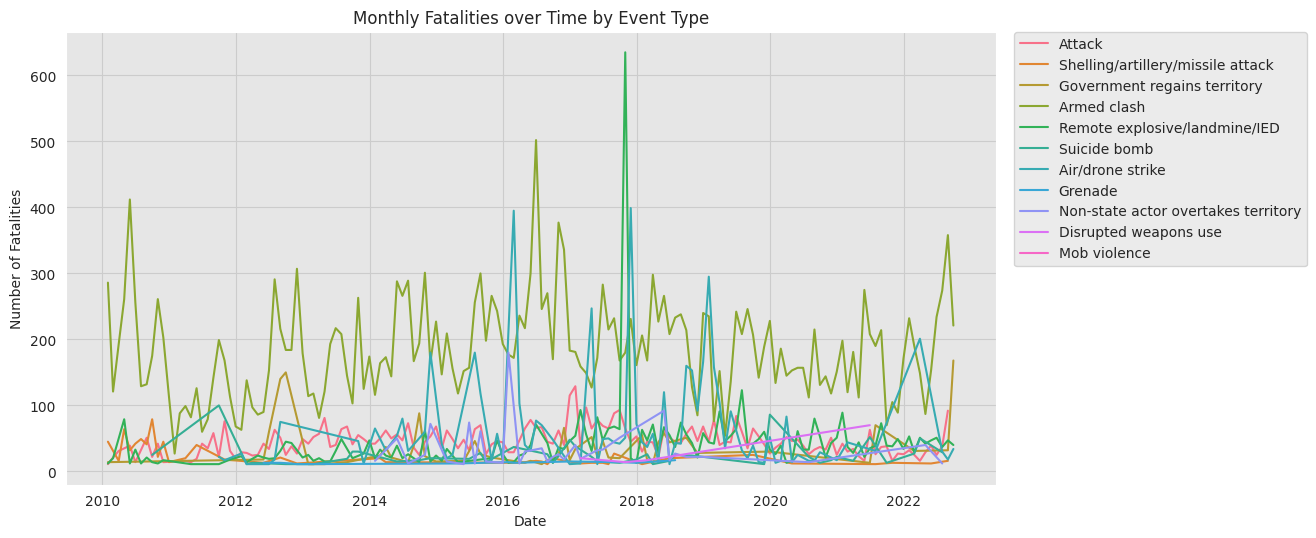

In [38]:
min_sum = 20
min_date = pd.to_datetime("2010-01-01")

df_monthly_event_sum_by_type = df.groupby(['sub_event_type', pd.Grouper(key='event_date', freq='M')])['fatalities'].sum().reset_index().sort_values('event_date')

selection_mask = (df_monthly_event_sum_by_type['fatalities']>min_count) & (df_monthly_event_sum_by_type['event_date']>min_date)
df_monthly_event_sum_by_type_filtered = df_monthly_event_sum_by_type[selection_mask]


fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_event_sum_by_type_filtered, color=sns_c[0], ax=ax, hue='sub_event_type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set(title='Monthly Fatalities over Time by Event Type', xlabel='Date', ylabel='Number of Fatalities');

Using groupings of 6 months at a time.

In [39]:
min_sum = 100
min_date = pd.to_datetime("2010-01-01")

df_biannual_event_sum_by_type = df.groupby(['sub_event_type', pd.Grouper(key='event_date', freq='6M')])['fatalities'].sum().reset_index().sort_values('event_date')

selection_mask = (df_biannual_event_sum_by_type['fatalities']>min_count) & (df_biannual_event_sum_by_type['event_date']>min_date)
df_biannual_event_sum_by_type_filtered = df_biannual_event_sum_by_type[selection_mask]

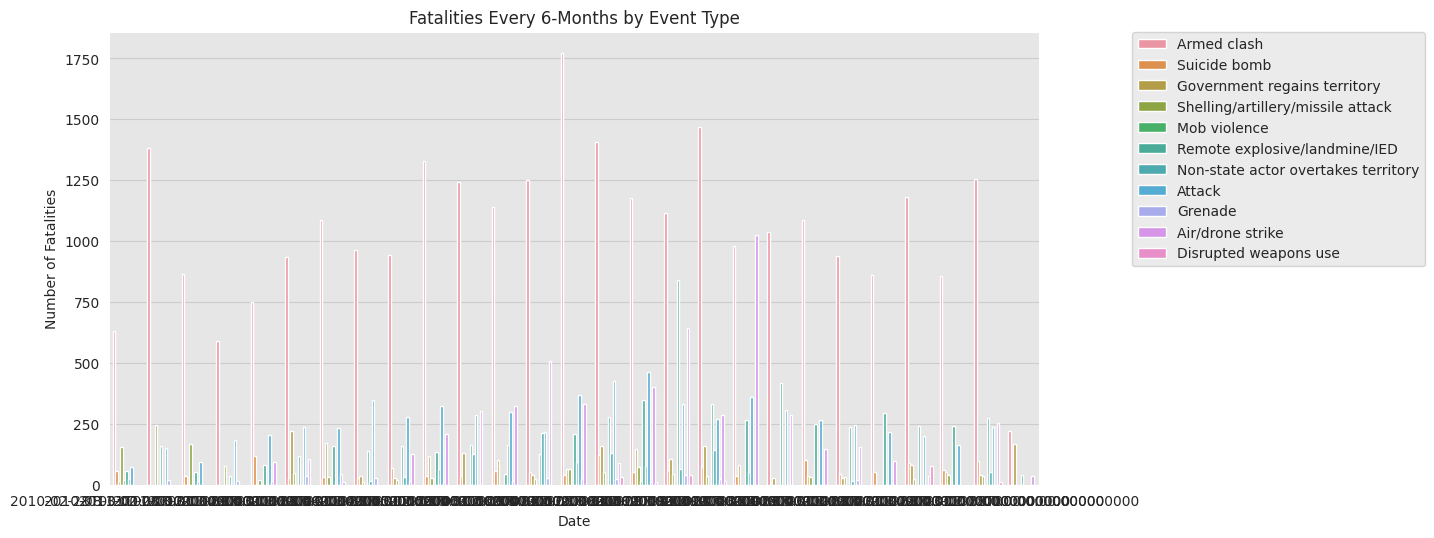

In [40]:
fig, ax1 = plt.subplots()
sns.barplot(x='event_date', y='fatalities', data=df_biannual_event_sum_by_type_filtered, ax=ax1, hue='sub_event_type')

# place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
# set labels for axis and title
ax1.set(title='Fatalities Every 6-Months by Event Type', xlabel='Date', ylabel='Number of Fatalities');

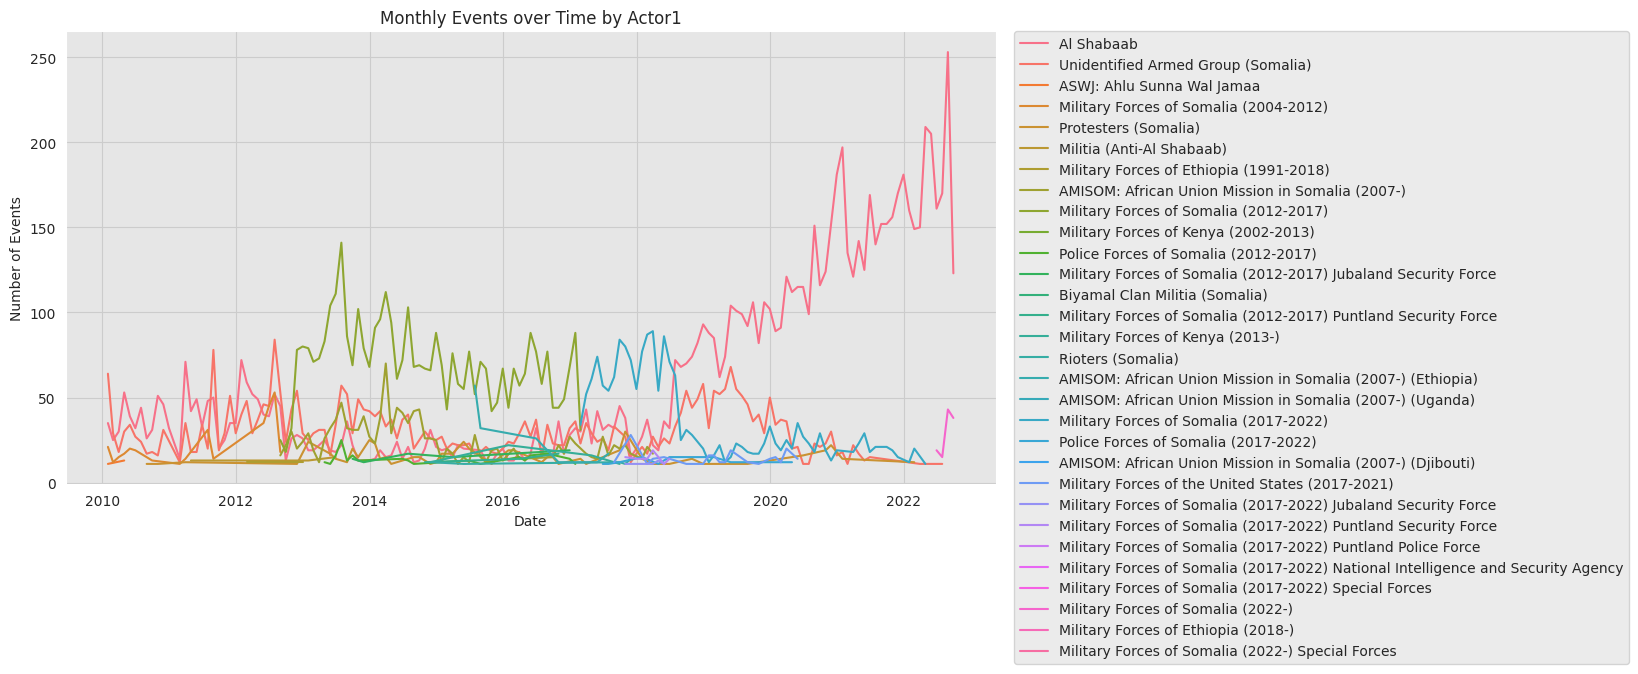

In [41]:
min_count = 10
min_date = pd.to_datetime("2010-01-01")


# filter to include only data where the count of events is greater than "min_count" and the date is after "min_date"
df_monthly_count_by_actor1 = df.groupby(['actor1', pd.Grouper(key='event_date', freq='M')])['fatalities'].count().reset_index().sort_values('event_date')
df_monthly_count_by_actor1 = df_monthly_count_by_actor1[df_monthly_count_by_actor1['fatalities']>min_count]
df_monthly_count_by_actor1 = df_monthly_count_by_actor1[df_monthly_count_by_actor1['event_date']>min_date]
# df_monthly_count_shabaab = df_monthly_count_shabaab[df_monthly_count_shabaab['actor1'] == "Al Shabaab"]

fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_count_by_actor1, color=sns_c[0], ax=ax, hue='actor1')
# place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# set labels for axis and title
ax.set(title='Monthly Events over Time by Actor1', xlabel='Date', ylabel='Number of Events');

In [42]:
df_actors = df
df_actors.loc[df_actors['actor1'].str.contains('Military'), 'actor1'] = 'Military Forces'
df_actors.loc[df_actors['actor1'].str.contains('AMISOM'), 'actor1'] = 'AMISOM: African Union Mission in Somalia'
df_actors.loc[df_actors['actor1'].str.contains('Police'), 'actor1'] = 'Police Forces of Somalia'

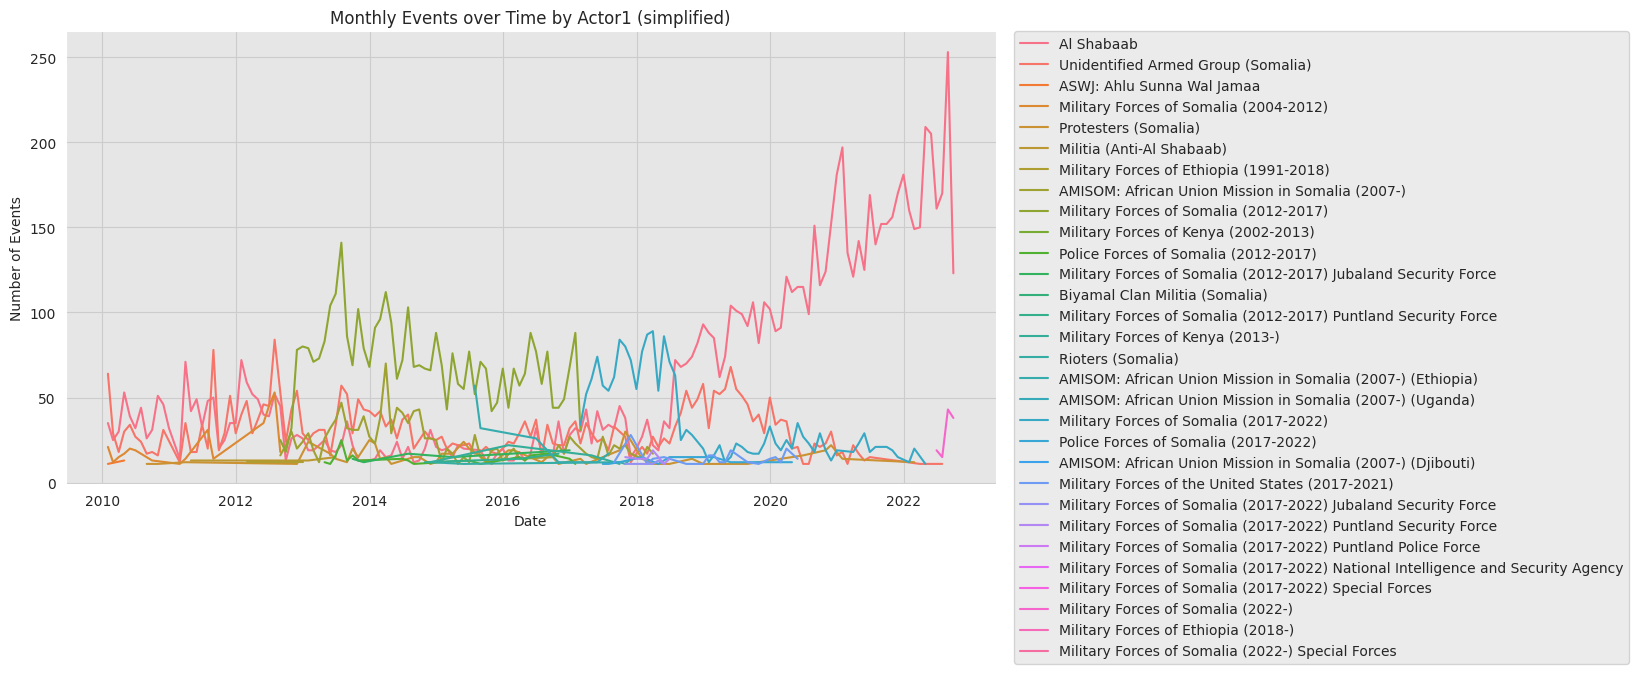

In [43]:
min_count = 10
min_date = pd.to_datetime("2010-01-01")


# filter to include only data where the count of events is greater than "min_count" and the date is after "min_date"
df_monthly_count_by_actor1_renamed = df_actors.groupby(['actor1', pd.Grouper(key='event_date', freq='M')])['fatalities'].count().reset_index().sort_values('event_date')
df_monthly_count_by_actor1_renamed = df_monthly_count_by_actor1_renamed[df_monthly_count_by_actor1_renamed['fatalities']>min_count]
df_monthly_count_by_actor1_renamed = df_monthly_count_by_actor1_renamed[df_monthly_count_by_actor1_renamed['event_date']>min_date]
# df_monthly_count_shabaab = df_monthly_count_shabaab[df_monthly_count_shabaab['actor1'] == "Al Shabaab"]

fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_count_by_actor1, color=sns_c[0], ax=ax, hue='actor1')
# place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# set labels for axis and title
ax.set(title='Monthly Events over Time by Actor1 (simplified)', xlabel='Date', ylabel='Number of Events');

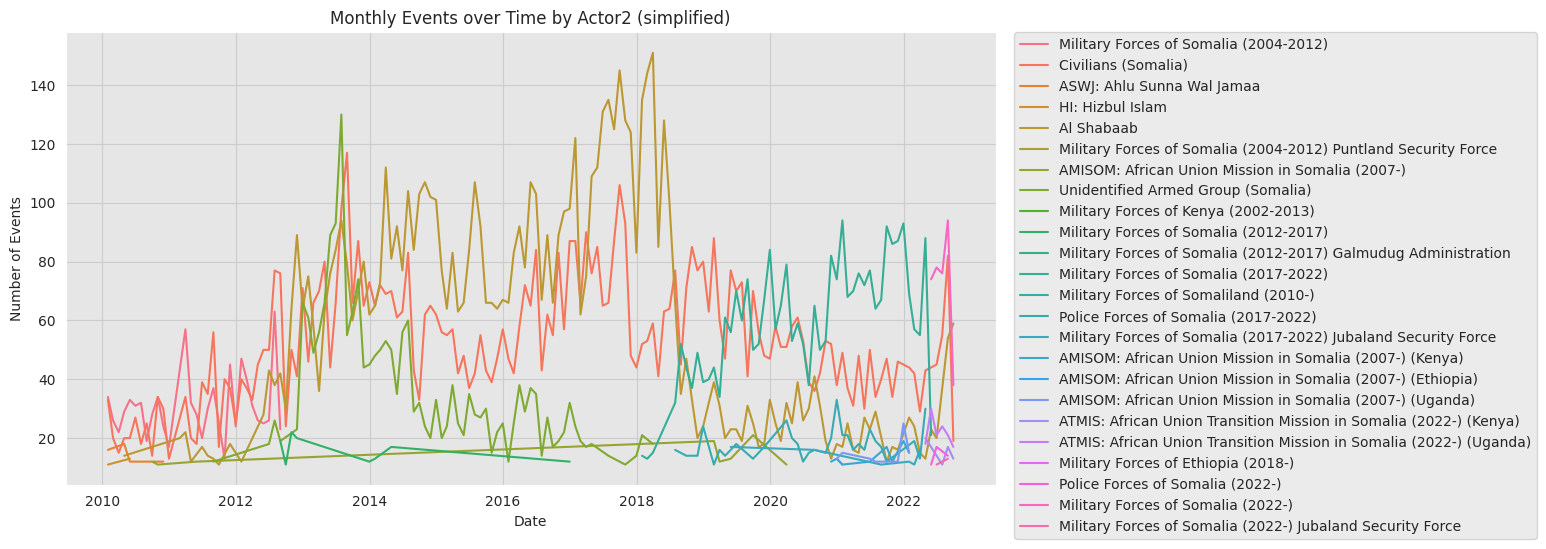

In [44]:
min_count = 10
min_date = pd.to_datetime("2010-01-01")

# filter to include only data where the count of events is greater than "min_count" and the date is after "min_date"
df_monthly_count_by_actor2 = df_actors.groupby(['actor2', pd.Grouper(key='event_date', freq='M')])['fatalities'].count().reset_index().sort_values('event_date')
df_monthly_count_by_actor2 = df_monthly_count_by_actor2[df_monthly_count_by_actor2['fatalities']>min_count]
df_monthly_count_by_actor2 = df_monthly_count_by_actor2[df_monthly_count_by_actor2['event_date']>min_date]
# df_monthly_count_shabaab = df_monthly_count_shabaab[df_monthly_count_shabaab['actor1'] == "Al Shabaab"]

fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_count_by_actor2, color=sns_c[0], ax=ax, hue='actor2')
# place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# set labels for axis and title
ax.set(title='Monthly Events over Time by Actor2 (simplified)', xlabel='Date', ylabel='Number of Events');

In [45]:
df_actors['actor2'] = df_actors['actor2'].replace(np.nan, 'Unknown')
df_actors.loc[df_actors['actor2'].str.contains('Military'), 'actor2'] = 'Military Forces'
df_actors.loc[df_actors['actor2'].str.contains('AMISOM'), 'actor2'] = 'AMISOM: African Union Mission in Somalia'
df_actors.loc[df_actors['actor2'].str.contains('Police'), 'actor2'] = 'Police Forces of Somalia'
df_actors.loc[df_actors['actor2'].str.contains('ATMIS'), 'actor2'] = 'ATMIS: African Union Transition Mission in Somalia'

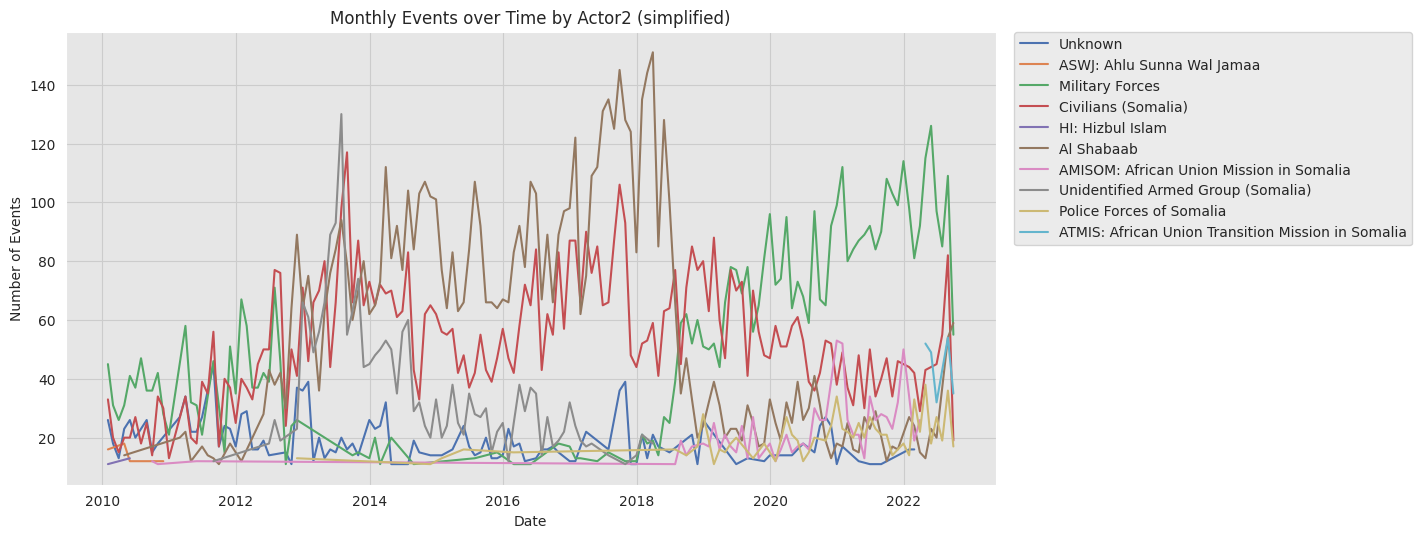

In [46]:
min_count = 10
min_date = pd.to_datetime("2010-01-01")

# filter to include only data where the count of events is greater than "min_count" and the date is after "min_date"
df_monthly_count_by_actor2_renamed = df_actors.groupby(['actor2', pd.Grouper(key='event_date', freq='M')])['fatalities'].count().reset_index().sort_values('event_date')
df_monthly_count_by_actor2_renamed = df_monthly_count_by_actor2_renamed[df_monthly_count_by_actor2_renamed['fatalities']>min_count]
df_monthly_count_by_actor2_renamed = df_monthly_count_by_actor2_renamed[df_monthly_count_by_actor2_renamed['event_date']>min_date]
# df_monthly_count_shabaab = df_monthly_count_shabaab[df_monthly_count_shabaab['actor1'] == "Al Shabaab"]

fig, ax = plt.subplots()
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_count_by_actor2_renamed, color=sns_c[0], ax=ax, hue='actor2')
# place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# set labels for axis and title
ax.set(title='Monthly Events over Time by Actor2 (simplified)', xlabel='Date', ylabel='Number of Events');

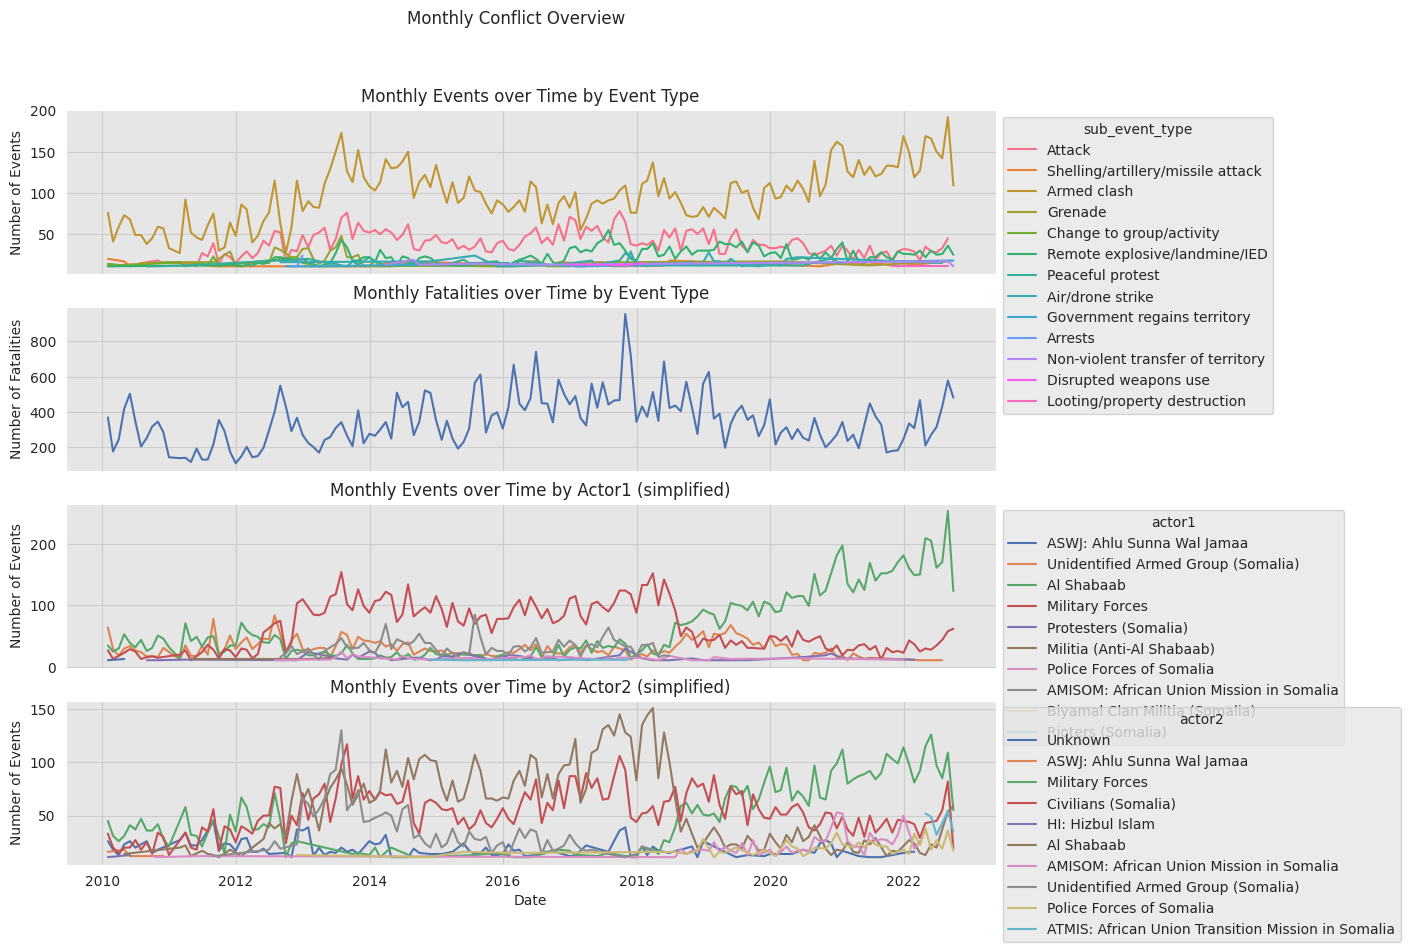

In [47]:
fig, axes = plt.subplots(4,1, sharex=True, figsize=(12,10))
fig.suptitle('Monthly Conflict Overview')

sns.lineplot(x='event_date', y='fatalities', data=df_monthly_event_count_by_type_filtered, color=sns_c[0], ax=axes[0], hue='sub_event_type')
axes[0].set(title='Monthly Events over Time by Event Type', ylabel='Number of Events');
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))

df_monthly_event_sum_by_type = df.groupby([pd.Grouper(key='event_date', freq='M')])['fatalities'].sum().reset_index().sort_values('event_date')
df_monthly_event_sum_by_type_filtered = df_monthly_event_sum_by_type[df_monthly_event_sum_by_type['fatalities']>min_sum]
df_monthly_event_sum_by_type_filtered = df_monthly_event_sum_by_type_filtered[df_monthly_event_sum_by_type_filtered['event_date']>min_date]
sns.lineplot(x='event_date', y='fatalities', data=df_monthly_event_sum_by_type_filtered, color=sns_c[0], ax=axes[1])
axes[1].set(title='Monthly Fatalities over Time by Event Type', ylabel='Number of Fatalities');

sns.lineplot(x='event_date', y='fatalities', data=df_monthly_count_by_actor1_renamed, color=sns_c[0], ax=axes[2], hue='actor1')
axes[2].set(title='Monthly Events over Time by Actor1 (simplified)', xlabel='Date', ylabel='Number of Events');
sns.move_legend(axes[2], "upper left", bbox_to_anchor=(1, 1))

sns.lineplot(x='event_date', y='fatalities', data=df_monthly_count_by_actor2_renamed, color=sns_c[0], ax=axes[3], hue='actor2')
axes[3].set(title='Monthly Events over Time by Actor2 (simplified)', xlabel='Date', ylabel='Number of Events');
sns.move_legend(axes[3], "upper left", bbox_to_anchor=(1, 1))

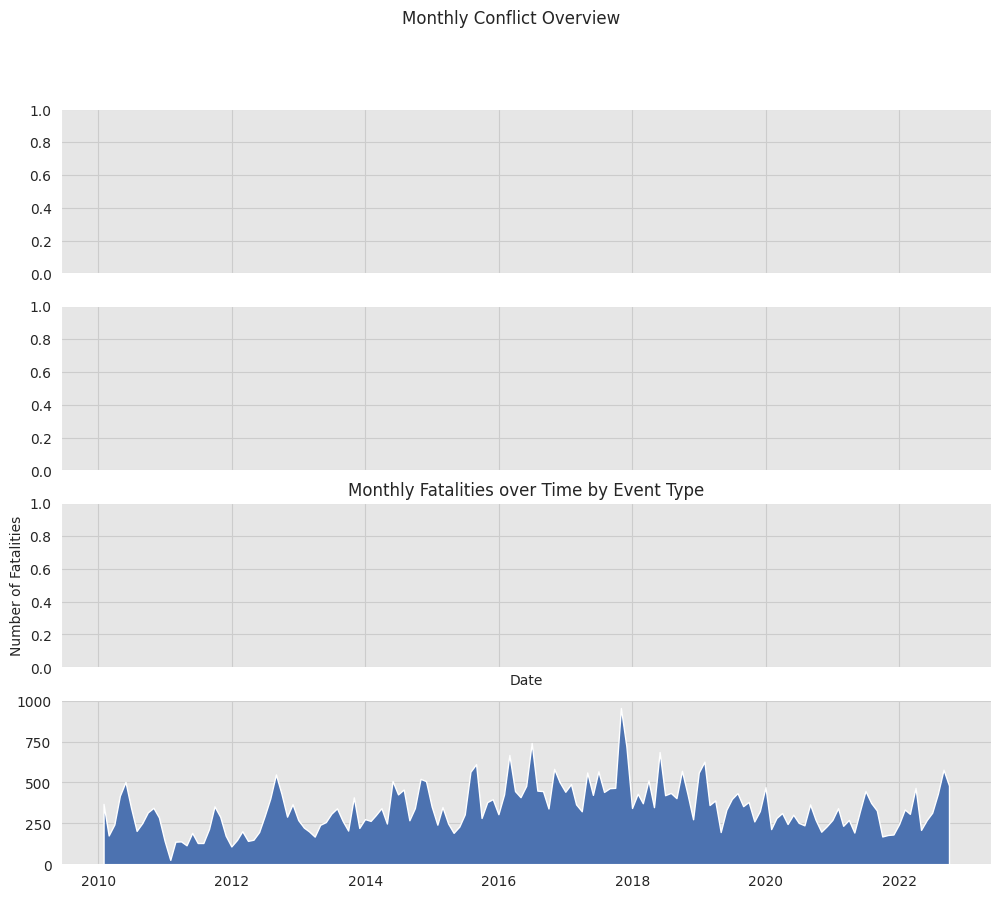

In [48]:
min_sum = 20
min_date = pd.to_datetime("2010-01-01")

df_monthly_event_sum_by_type = df.groupby([pd.Grouper(key='event_date', freq='M')])['fatalities'].sum().reset_index().sort_values('event_date')

# filter to include only data where the count of events is greater than "min_sum" and the date is after "min_date"
df_monthly_event_sum_by_type_filtered = df_monthly_event_sum_by_type[df_monthly_event_sum_by_type['fatalities']>min_sum]
df_monthly_event_sum_by_type_filtered = df_monthly_event_sum_by_type_filtered[df_monthly_event_sum_by_type_filtered['event_date']>min_date]


fig, axes = plt.subplots(4,1, sharex=True, figsize=(12,10))
fig.suptitle('Monthly Conflict Overview')

plt.stackplot(df_monthly_event_sum_by_type_filtered['event_date'], df_monthly_event_sum_by_type_filtered['fatalities'])
# sns.barplot(x='event_date', y='fatalities', data=df_monthly_event_sum_by_type_filtered, color=sns_c[0], ax=axes[2])
# sns.barplot(x='event_date', y='fatalities', data=df_monthly_event_sum_by_type_filtered, color=sns_c[0], ax=axes[2])
# plt.setp(axes[2].patches, linewidth=0)
axes[2].set(title='Monthly Fatalities over Time by Event Type', xlabel='Date', ylabel='Number of Fatalities');
